# Mtb metabolism

- Gene source: Rienksma et al. (2019) DOI: [10.3389/fcimb.2019.00144](https://doi.org/10.3389/fcimb.2019.00144)

Download Mtb model iEK1366 from its [publication](https://doi.org/10.1186/s12918-018-0557-y).

In [1]:
import requests
import zipfile
import io

response = requests.get("https://www.ncbi.nlm.nih.gov/pmc/articles/PMC5834885/bin/12918_2018_557_MOESM3_ESM.zip", stream=True)
if response.status_code == 200:
    z = zipfile.ZipFile(io.BytesIO(response.content))
    z.extractall("iEK1011")

Read model

In [2]:
import cobra
import networkx as nx

from plotnet import NetPlotter

In [3]:
# model_invivo = cobra.io.load_json_model("iEK1011/iEK1011_inVivo_media.json")
# model_invivo.optimize()

In [4]:
model = cobra.io.load_json_model("iEK1011/iEK1011_m7H10_media.json")
model.summary()

In [5]:
np = NetPlotter(model)

## Rifampicin

- Targets: rpoB ([Rv0667](https://mycobrowser.epfl.ch/genes/Rv0667)), not a metabolic target.

rpoB is the β subunit of the bacterial RNA polymerase, which is targeted by the first-line anti-tuberculosis drug, rifampicin. Resistance to rifampicin is caused by the mutations in the binding pocket of the **drug** https://doi.org/10.1038/s41598-019-46756-x


In [6]:
"Rv0667" in model.genes

False

# Isoniazid

Inhibits mycolic acid synthesis and folate synthesis.

- Activated by katG ([Rv1908c](https://mycobrowser.epfl.ch/genes/Rv1908c)).
- One of the targets is *inhA* ([Rv1484](https://mycobrowser.epfl.ch/genes/Rv1484)).

In [7]:
model.genes.Rv1484

<Gene Rv1484 at 0x25e365bce30>

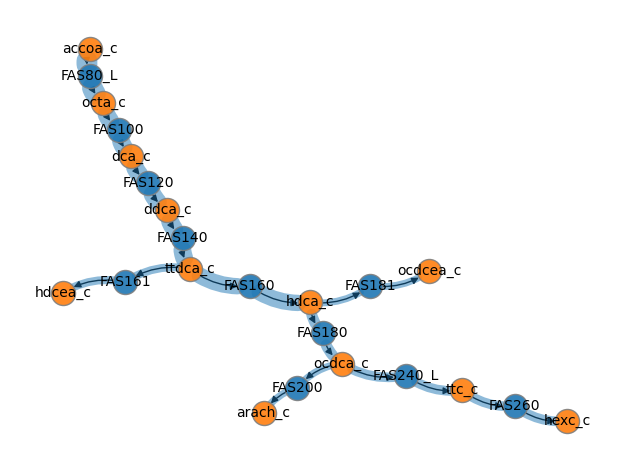

In [8]:
OMIT = {"h2o_c", "h_c", "nadph_c", "nadp_c", "nadh_c", "nad_c", "co2_c", "o2_c", "coa_c", "malcoa_c"}
inhA_reactions = set(reaction.id for reaction in model.genes.Rv1484.reactions)
np.plot(reaction_ids=inhA_reactions, omit_metabolites=OMIT, layout_func=nx.nx_agraph.graphviz_layout)

Active reactions:

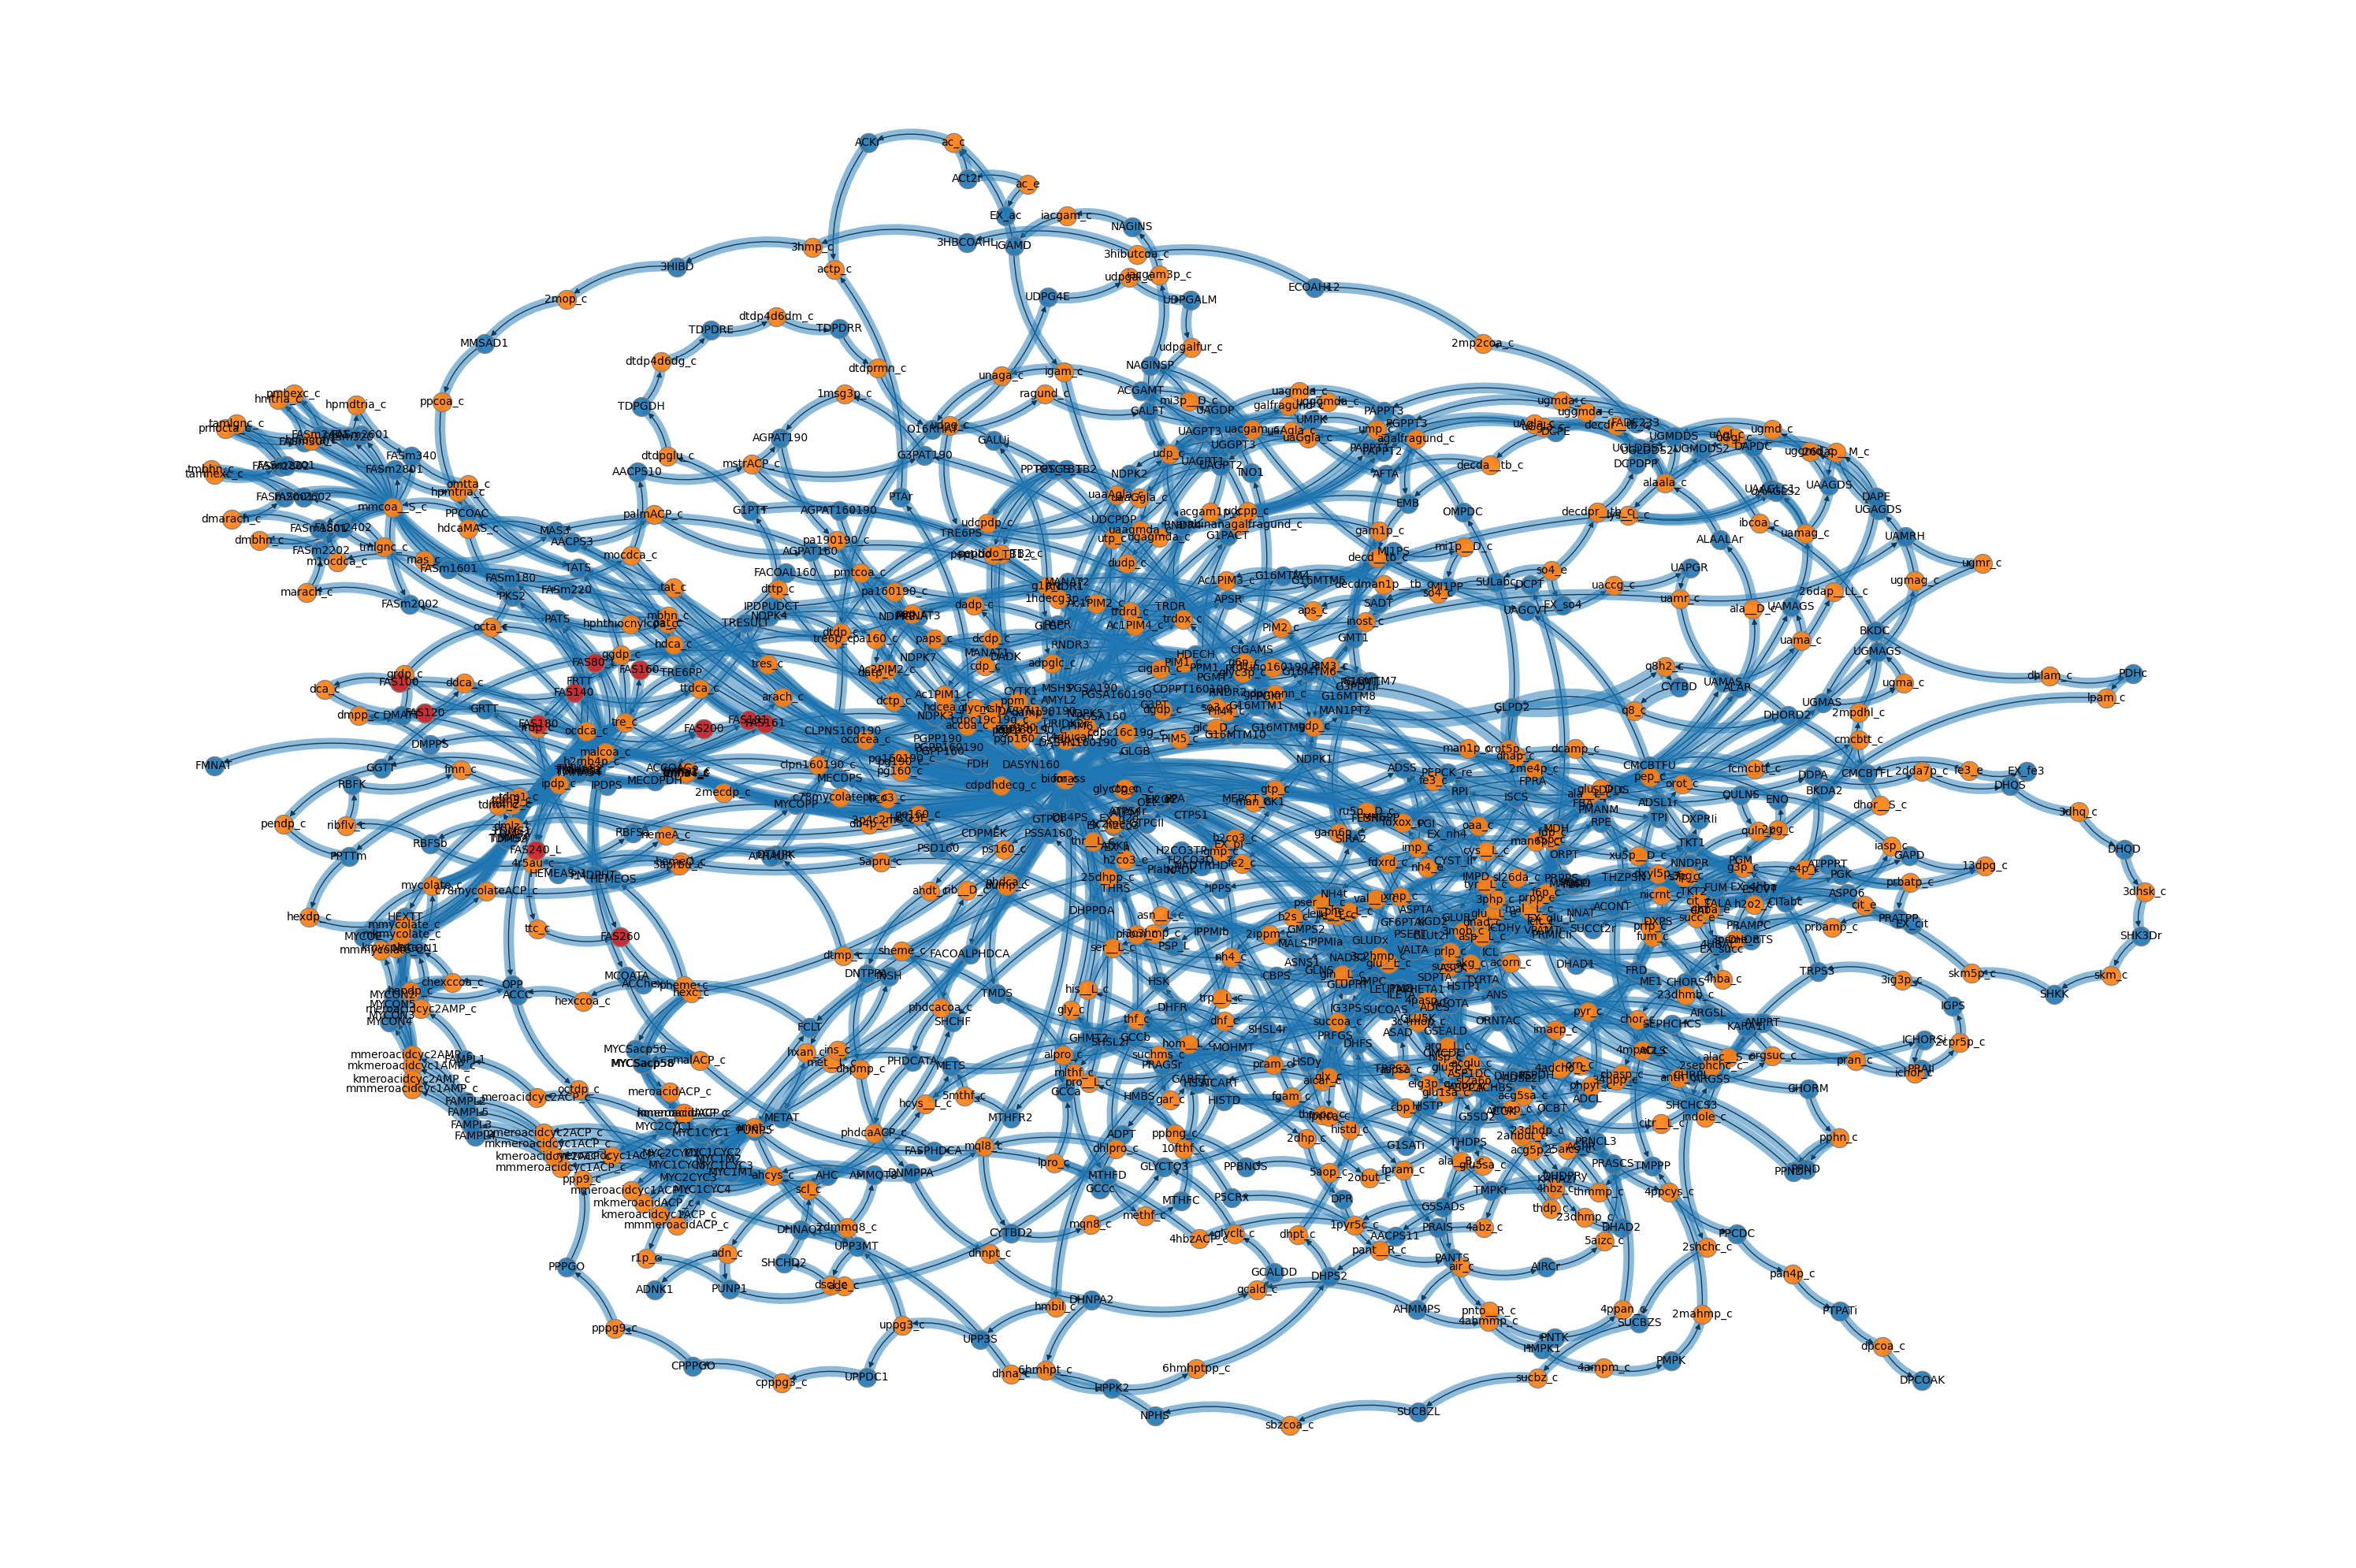

In [9]:
OMIT = {
    "h2o", "h", "atp", "adp", "amp", "pi",
    "coa", "nad", "co2", "ppi", "nad", "nadh", "nadp",
    "nadph", "fad", "fadh2", "o2", "ACP"
}

solution = model.optimize()
active_reactions = set(solution.fluxes[solution.fluxes.abs() > 1e-9].keys())
inhA_reactions = set(reaction.id for reaction in model.genes.Rv1484.reactions)

np.plot(
    reaction_ids=active_reactions,
    omit_metabolites=set(m + "_c" for m in OMIT) | set(m + "_e" for m in OMIT),
    highlight_nodes=inhA_reactions,
    figsize=(30,20)
)

In [10]:
std_growth = model.slim_optimize()
print(f"Standard growth: {std_growth:g}")

with model:
    model.genes.Rv1484.knock_out()
    growth = model.slim_optimize()
    print(f"KO inhA: {growth:g} ({100 * (1 - growth / std_growth):.2f} % decrease)")

Standard growth: 0.0165647
KO inhA: 1.1658e-17 (100.00 % decrease)
